### This is an experiment following the instructions given in the YouTube video "Linear Regression Algorithm in Python from Scratch" by DataQuest. This is the link to the video: https://www.youtube.com/watch?v=z2hpinQggNM. There is also a GitHub page: https://github.com/dataquestio/project-walkthroughs/tree/master/linear_regression.

Goal for prediction: Given how many athletes are entered into the Olympics for a country, can we predict how many medals they'll win.

y^ = b<sub>0</sub> + b<sub>1</sub>x <br/> 
y^ is the predicted medals  
b0 is the y-intercept of the line (where the line will hit the y-axis)  
b1 is the coefficient for athletes (slope of the regression line) -- for every one athlete, how many medals are they expected to win?  
x is the athlete count

If there are 300 athletes, the y-intercept is -3.7, and the coefficient is 0.2, the formula would look like this:  
y^ = -3.7 + 0.2 * 300  
  
One way to understand this is that the coefficient means how many medals are received per athlete. In this case, for every athlete entered into the the Olympics, it is expected that they'll win 0.2 medals.  
  
The predicted y (y^) is 56.4. This means that if our country enters 300 athletes into the Olympics, then we will get 56.4 medals.

y = b<sub>0</sub> + b<sub>1</sub>x + ε <br/>
y is the actual medals <br/>
ε is the error  
  
Using the graph, I can actually fill in pieces of this formula since this is using an actual data point instead of predicting. For example, one data point is (438, 106). I just need to put these numbers in the correct spot for x and y. (See the graph a few lines below.)  
106 = b<sub>0</sub> + b<sub>1</sub> * 438 + ε

In [2]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [3]:
data_folder = pathlib.Path.cwd()/'data'
data_folder

PosixPath('/Users/kerstinwolf/DS Projects/GitHub/Experiments/data')

In [4]:
teams = pd.read_csv(data_folder/"teams.csv")
teams

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
...,...,...,...,...,...,...,...,...,...
2009,ZIM,2000,26,19,25.0,179.0,71.1,0.0,0
2010,ZIM,2004,14,11,25.1,177.8,70.5,0.0,3
2011,ZIM,2008,16,15,26.1,171.9,63.7,3.0,4
2012,ZIM,2012,9,8,27.3,174.4,65.2,4.0,0


Text(0, 0.5, 'Medals')

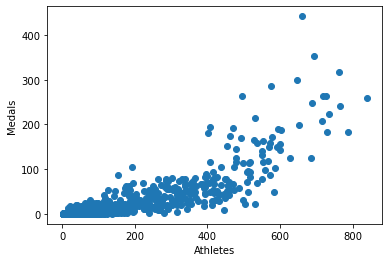

In [62]:
plt.scatter(teams[["athletes"]], teams[["medals"]])
plt.xlabel("Athletes")
plt.ylabel("Medals")

In [59]:
X = teams[["athletes", "prev_medals"]].copy()
y = teams[["medals"]].copy()

In [13]:
X

,athletes,prev_medals
0,8,0.0
1,5,0.0
2,8,0.0
3,11,0.0
4,5,0.0
...,...,...
2009,26,0.0
2010,14,0.0
2011,16,3.0
2012,9,4.0


In [15]:
y

,medals
0,0
1,0
2,0
3,0
4,0
...,...
2009,0
2010,3
2011,4
2012,0


In [17]:
X[["intercept"]] = 1

In [18]:
X = X[["intercept", "athletes", "prev_medals"]]

In [19]:
X

,intercept,athletes,prev_medals
0,1,8,0.0
1,1,5,0.0
2,1,8,0.0
3,1,11,0.0
4,1,5,0.0
...,...,...,...
2009,1,26,0.0
2010,1,14,0.0
2011,1,16,3.0
2012,1,9,4.0


In [20]:
X_T = X.T

In [21]:
X_T

,0,1,2,3,4,5,6,7,8,9,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
intercept,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
athletes,8.0,5.0,8.0,11.0,5.0,4.0,6.0,3.0,4.0,5.0,...,52.0,20.0,47.0,28.0,21.0,26.0,14.0,16.0,9.0,31.0
prev_medals,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0


The formula is:  
B = (X<sup>T</sup> X)<sup>-1</sup> X<sup>T</sup> y

In [22]:
# This is taking the transpose of X, multiplying it by X, and then taking the inverse of the whole thing before multiplying it again by the transpose of X and then multiplying it by y.
# This is the formula to calculate the coefficients (see the YouTube video for more info about how we got this formula)
# @ is the matrix multiplication operator
B = np.linalg.inv(X_T @ X) @ X_T @ y

In [23]:
# This is the coefficients
# 0 is the y-intercept, 1 is for every one athlete how many medals are expected to be won, and 2 is for every medal won previously how many would you expect to win now
# basically, 0 is the y-intercept, 1 is athletes, and 2 is previous medals
B

,medals
0,-1.961889
1,0.071112
2,0.734137


In [25]:
B.index = X.columns
B

,medals
intercept,-1.961889
athletes,0.071112
prev_medals,0.734137


In [27]:
predictions = X @ B
predictions

,medals
0,-1.392992
1,-1.606329
2,-1.392992
3,-1.179656
4,-1.606329
...,...
2009,-0.112974
2010,-0.966319
2011,1.378315
2012,1.614667


R Squared Value = how much of the variance in the data set are explained by the X values  
r<sup>2</sup> = 1 - (SSR / SST) <br/>
  
SSR = Sum of Squared Residuals  
SST = Total Sum of Squares

In [29]:
# SSR = the sum of all of the errors between the predicted y values and the actual y values
SSR = ((y - predictions) ** 2).sum()
SSR

medals    290620.124598
dtype: float64

In [30]:
# SST = the amount of variance in the data
SST = ((y - y.mean()) ** 2).sum()
SST

medals    2.276322e+06
dtype: float64

In [31]:
R2 = 1 - (SSR / SST)
R2

medals    0.872329
dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(teams[["athletes", "prev_medals"]], teams[["medals"]])

LinearRegression()

In [50]:
lr.intercept_

array([-1.96188939])

In [51]:
lr.coef_

array([[0.07111214, 0.73413679]])

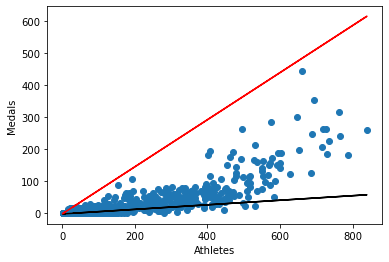

In [16]:
# This just a scatter plot with some lines plotting the resulting y-intercept and slope
plt.scatter(teams[["athletes"]], teams[["medals"]])
plt.xlabel("Athletes")
plt.ylabel("Medals")

# this is how to plot the line
plt.plot(teams[["athletes"]], -1.961889 + 0.071112 * teams[["athletes"]], color = "k") #line for expected medals
plt.plot(teams[["athletes"]], -1.961889 + 0.734137 * teams[["athletes"]], color = "r") #line for previous medals

#plt.plot(teams[["athletes"]], -1.961889 + (0.071112 * teams[["athletes"]]) + (0.734137 * teams[["athletes"]]), color = "b")